In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.txt"


In [13]:
!pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/41.0 MB ? eta -:--:--
    --------------------------------------- 0.5/41.0 MB 415.1 kB/s eta 0:01:38
    --------------------------------------- 0.5/41.0 MB 415.1 kB/s eta 0:01:38
    ------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
individual_household_electric_power_consumption = fetch_ucirepo(id=235) 
  
# data (as pandas dataframes) 
X = individual_household_electric_power_consumption.data.features 
y = individual_household_electric_power_consumption.data.targets 
  
# metadata 
print(individual_household_electric_power_consumption.metadata) 
  
# variable information 
print(individual_household_electric_power_consumption.variables) 


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [23]:
#pandas libaries code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#linear regression function in mean squared error,mean absolute error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [26]:
import os
print(os.getcwd())


c:\Users\SATHYA COMPUTERS\Documents\powerpulse


In [31]:
import os
os.listdir()


['datapreprocessing.ipynb']

In [ ]:
import pandas as pd
from io import StringIO
#sample dataset in global reactive power
sample_data = """
Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000
16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000
"""
#rename column in data for datetime
df = pd.read_csv(StringIO(sample_data), sep=';', parse_dates=[[0, 1]])
df.rename(columns={'Date_Time': 'Datetime'}, inplace=True)
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df.dropna(inplace=True)
df.head()


,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0


In [34]:
# Ensure 'Datetime' is set as the index
df.set_index('Datetime', inplace=True)

# Resample by hour and compute the mean for each hour
df_hourly = df.resample('H').mean()


In [38]:
# Calculate IQR
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[(df['Global_active_power'] >= Q1 - 1.5 * IQR) & 
                    (df['Global_active_power'] <= Q3 + 1.5 * IQR)]


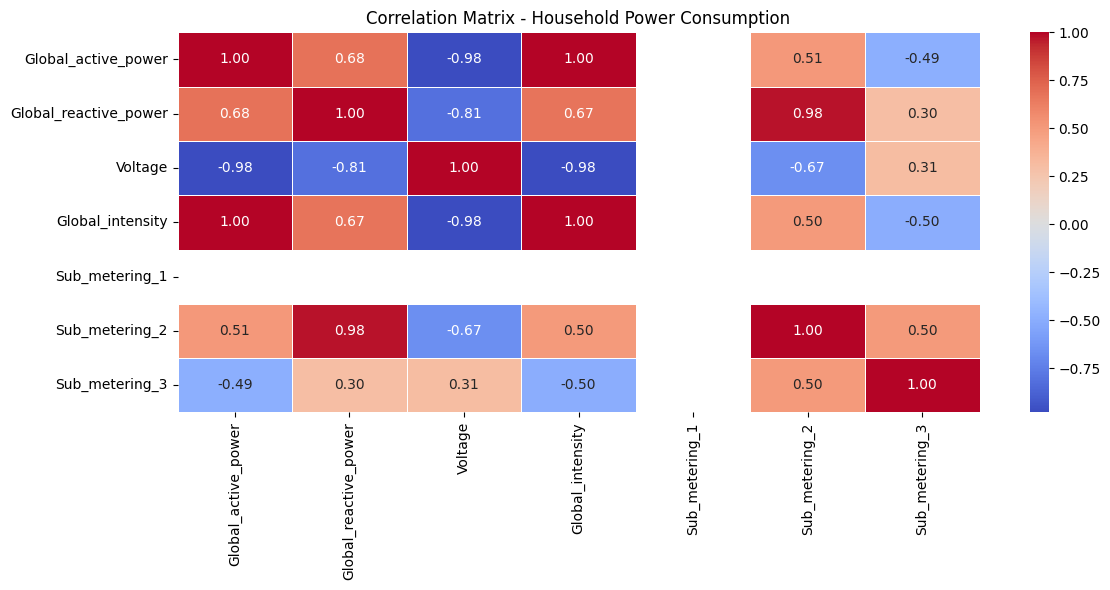

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_no_outliers.corr()

# Plot it
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Household Power Consumption')
plt.tight_layout()
plt.show()


In [46]:
# If it's the index and not a column:
df_hourly['Datetime'] = df_hourly.index


In [47]:
df_hourly['Hour'] = df_hourly['Datetime'].dt.hour
df_hourly['Weekday'] = df_hourly['Datetime'].dt.weekday  # Monday=0, Sunday=6
df_hourly['Month'] = df_hourly['Datetime'].dt.month


In [48]:
print(df_hourly.columns)


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Lag_1', 'Lag_24', 'Datetime', 'Hour', 'Weekday',
       'Month'],
      dtype='object')


In [49]:
X = df_hourly[['Lag_1', 'Lag_24', 'Hour', 'Weekday', 'Month']]
y = df_hourly['Global_active_power']


In [51]:
print(df_hourly.shape)
print(df_hourly.head())


(0, 13)
Empty DataFrame
Columns: [Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, Lag_1, Lag_24, Datetime, Hour, Weekday, Month]
Index: []


In [52]:
print(df_hourly[['Lag_1', 'Lag_24', 'Hour', 'Weekday', 'Month']].isnull().sum())


Lag_1      0
Lag_24     0
Hour       0
Weekday    0
Month      0
dtype: int64


In [53]:
df_hourly.dropna(subset=['Lag_1', 'Lag_24', 'Hour', 'Weekday', 'Month', 'Global_active_power'], inplace=True)


In [56]:
print(df_hourly.columns)


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Lag_1', 'Lag_24', 'Datetime', 'Hour', 'Weekday',
       'Month'],
      dtype='object')


In [57]:
features = ['hour', 'day_of_week', 'temperature', 'humidity']  # just an example


In [59]:
print(df_hourly.columns)


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Lag_1', 'Lag_24', 'Datetime', 'Hour', 'Weekday',
       'Month'],
      dtype='object')


In [62]:
features = ['Voltage', 'Global_reactive_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
X = df_hourly[features].dropna()
y = df_hourly.loc[X.index, 'Global_active_power']


In [64]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (0, 5)
y shape: (0,)


In [65]:
print(df_hourly.head())
print(df_hourly.isna().sum())  # Check for NaNs


Empty DataFrame
Columns: [Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, Lag_1, Lag_24, Datetime, Hour, Weekday, Month]
Index: []
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Lag_1                    0
Lag_24                   0
Datetime                 0
Hour                     0
Weekday                  0
Month                    0
dtype: int64


In [66]:
features = ['Voltage', 'Global_reactive_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
print(df_hourly[features].shape)
print(df_hourly[features].dropna().shape)


(0, 5)
(0, 5)


In [67]:
X = df_hourly[features].fillna(0)  # or use df_hourly[features].interpolate()
y = df_hourly['Global_active_power'].fillna(0)


In [69]:
print("Full DataFrame shape:", df_hourly.shape)
print("Selected features:", features)
print("Feature data (before dropna):", df_hourly[features].shape)
print("Feature data (after dropna):", df_hourly[features].dropna().shape)
print("NaNs in features:\n", df_hourly[features].isna().sum())
print("Sample rows:\n", df_hourly[features].head())


Full DataFrame shape: (0, 13)
Selected features: ['Voltage', 'Global_reactive_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
Feature data (before dropna): (0, 5)
Feature data (after dropna): (0, 5)
NaNs in features:
 Voltage                  0
Global_reactive_power    0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64
Sample rows:
 Empty DataFrame
Columns: [Voltage, Global_reactive_power, Sub_metering_1, Sub_metering_2, Sub_metering_3]
Index: []


In [70]:
print("Target column NaNs:", df_hourly['Global_active_power'].isna().sum())


Target column NaNs: 0


In [71]:
X = df_hourly[features].fillna(method='ffill').fillna(method='bfill')  # simple fill
y = df_hourly['Global_active_power'].fillna(method='ffill').fillna(method='bfill')


In [73]:
# Step 1: Print overall shape
print("🔎 df_hourly shape:", df_hourly.shape)

# Step 2: Print columns
print("🧾 Columns:", df_hourly.columns.tolist())

# Step 3: Check for NaNs in all columns
print("🧼 NaN counts:\n", df_hourly.isna().sum())

# Step 4: Print the first few rows
print("📋 Sample rows:\n", df_hourly.head())


🔎 df_hourly shape: (0, 13)
🧾 Columns: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Lag_1', 'Lag_24', 'Datetime', 'Hour', 'Weekday', 'Month']
🧼 NaN counts:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Lag_1                    0
Lag_24                   0
Datetime                 0
Hour                     0
Weekday                  0
Month                    0
dtype: int64
📋 Sample rows:
 Empty DataFrame
Columns: [Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, Lag_1, Lag_24, Datetime, Hour, Weekday, Month]
Index: []


In [74]:
print("✅ Any non-empty data?", df_hourly.dropna().shape)


✅ Any non-empty data? (0, 13)


In [72]:
print("X shape:", X.shape)
print("y shape:", y.shape)

# If both have rows, proceed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X shape: (0, 5)
y shape: (0,)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [61]:
Index(['DateTime', 'Global_active_power', 'Voltage', 'Global_reactive_power',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')


NameError: name 'Index' is not defined

In [60]:
Index(['DateTime', 'Global_active_power', 'Voltage', 'Global_reactive_power',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')


NameError: name 'Index' is not defined

In [58]:
X = df_hourly[features].dropna()
y = df_hourly.loc[X.index, 'Global_active_power']


KeyError: "None of [Index(['hour', 'day_of_week', 'temperature', 'humidity'], dtype='object')] are in the [columns]"

In [55]:
X = df_hourly[features]  # or a similar selection


NameError: name 'features' is not defined

In [54]:
X = df_hourly[['Lag_1', 'Lag_24', 'Hour', 'Weekday', 'Month']]
y = df_hourly['Global_active_power']

print("Samples available:", X.shape[0])  # Check size again

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Samples available: 0


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and Target
X = df_hourly[['Lag_1', 'Lag_24', 'Hour', 'Weekday', 'Month']]
y = df_hourly['Global_active_power']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [45]:
# Create lag features (optional)
df_hourly['Lag_1'] = df_hourly['Global_active_power'].shift(1)
df_hourly['Lag_24'] = df_hourly['Global_active_power'].shift(24)

# Drop NaNs from lag features
df_hourly.dropna(inplace=True)

# Features and Target
X = df_hourly[['Lag_1', 'Lag_24', 'Hour', 'Weekday', 'Month']]
y = df_hourly['Global_active_power']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


KeyError: "['Hour', 'Weekday', 'Month'] not in index"

In [37]:
import pandas as pd

df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 low_memory=False, na_values='?', 
                 parse_dates=[[0, 1]], infer_datetime_format=True)

df.rename(columns={'Date_Time': 'Datetime'}, inplace=True)
df.dropna(inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: 'household_power_consumption.txt'

In [36]:
correlation_matrix = df_no_outliers.corr()
plt.figure(figsize-(12,1))
sns-heatmap(correlation_matrix,annot_True,cmap-'coolwarm',fml-'.2f')
plt.show()

NameError: name 'df_no_outliers' is not defined

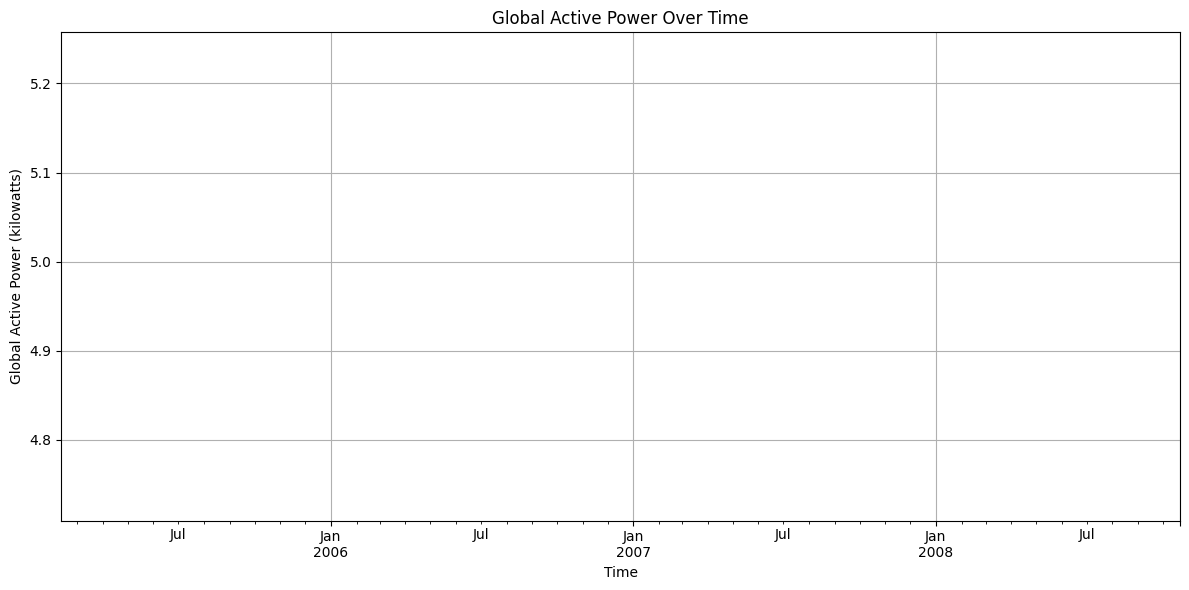

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_hourly['Global_active_power'].plot()
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
#figure of data and some of date values
plt.figure(figsize=(12, 6))
df_hourly['Global_active_power'].plot()
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_hourly.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


NameError: name 'df_hourly' is not defined

<Figure size 1200x600 with 0 Axes>

In [30]:
# Convert Datetime to pandas datetime
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

# Drop rows with NaNs
df.dropna(inplace=True)

# Convert relevant columns to float
for col in df.columns[1:]:
    df[col] = df[col].astype(float)

# Create additional time-based features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Weekday'] = df['Datetime'].dt.weekday

# Aggregate to hourly/daily average to reduce granularity (optional)
df_hourly = df.resample('H', on='Datetime').mean().dropna()
df_hourly.head()


NameError: name 'df' is not defined

In [29]:
import pandas as pd

df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 low_memory=False, na_values='?', 
                 parse_dates=[[0, 1]], infer_datetime_format=True)

df.rename(columns={'Date_Time': 'Datetime'}, inplace=True)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'household_power_consumption.txt'